In [1]:
import pandas as pd # для работы с датафреймом
import numpy as np # для вычислений
import matplotlib.pyplot as plt # для графиков
import seaborn as sns # для графиков
from scipy.stats import norm # проверка распределения 
from scipy import stats # статистический анализ
import scipy.stats as stats # статистический анализ
from mlxtend.evaluate import permutation_test # перестановочный тест
import statsmodels.stats.multicomp as mc # HDS тест для определения групп
import re # для регулярных выражений
import pingouin as pg # базовые ф-ии библиотеки
from pingouin import welch_anova #тест Велча

In [2]:
df = pd.read_excel(r'C:\Users\Mln\jupyter-lab\random_test\mindset\task\Задача.xlsx')

print(df.head())

   Персона  Возраст, лет  Стаж вождения, лет  Убыточность, %  \
0  6-LLJEH            20                   1             263   
1  2-GLHFG            74                  51             107   
2  6-FJFKL            27                   1             165   
3  4-KJEJL            24                   6             348   
4  5-JFFGH            26                   3             286   

   Уровень заработной платы, руб/год  
0                             716693  
1                             274393  
2                             723841  
3                             139419  
4                             650003  


**Цель - узнать от чего зависит показатель убыточности**

In [3]:
df.shape

(484, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Персона                            484 non-null    object
 1   Возраст, лет                       484 non-null    int64 
 2   Стаж вождения, лет                 484 non-null    int64 
 3   Убыточность, %                     484 non-null    int64 
 4   Уровень заработной платы, руб/год  484 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.0+ KB


In [5]:
df.isnull().sum()

Персона                              0
Возраст, лет                         0
Стаж вождения, лет                   0
Убыточность, %                       0
Уровень заработной платы, руб/год    0
dtype: int64

In [6]:
df.columns

Index(['Персона', 'Возраст, лет', 'Стаж вождения, лет', 'Убыточность, %',
       'Уровень заработной платы, руб/год'],
      dtype='object')

In [7]:
df.rename(columns={'Уровень заработной платы, руб/год':'Зарплата руб/год'}, inplace=True)
df.columns

Index(['Персона', 'Возраст, лет', 'Стаж вождения, лет', 'Убыточность, %',
       'Зарплата руб/год'],
      dtype='object')

In [8]:
df.nunique()
#Here looking though the data to see the structure

Персона               484
Возраст, лет           58
Стаж вождения, лет     49
Убыточность, %        300
Зарплата руб/год      484
dtype: int64

In [9]:
#Смотрю есть ли дубликаты
df.duplicated(subset=['Персона']).sum()

0

In [10]:
df['Убыточность, %'].describe()

count    484.000000
mean     227.074380
std      171.561271
min       20.000000
25%      103.000000
50%      173.000000
75%      299.250000
max      700.000000
Name: Убыточность, %, dtype: float64

In [11]:
df.head()

,Персона,"Возраст, лет","Стаж вождения, лет","Убыточность, %",Зарплата руб/год
0,6-LLJEH,20,1,263,716693
1,2-GLHFG,74,51,107,274393
2,6-FJFKL,27,1,165,723841
3,4-KJEJL,24,6,348,139419
4,5-JFFGH,26,3,286,650003


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Персона             484 non-null    object
 1   Возраст, лет        484 non-null    int64 
 2   Стаж вождения, лет  484 non-null    int64 
 3   Убыточность, %      484 non-null    int64 
 4   Зарплата руб/год    484 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.0+ KB


- Характеристики центрального положения для количественных признаков. Метод describe;
- Характеристики категориальных данных. Тот же describe;
- Как распределен возраст, используем график;
- Какие люди получили максимальную убыточность?
- Какие люди чаще всего получали одинаковый показатель убыточности? Используем график
- От каких признаков зависит убыточность? Использую кореляцию, дисперсионный анализ


## Центральное положение

In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # убираем в выводе экспоненту
df.describe()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %",Зарплата руб/год
count,484.000,484.000,484.000,484.000
mean,45.320,21.417,227.074,1017900.837
std,19.633,18.037,171.561,1187545.127
min,20.000,1.000,20.000,120185.000
25%,26.000,5.000,103.000,194998.000
50%,39.500,15.000,173.000,441028.000
75%,65.000,38.000,299.250,1109668.250
max,79.000,58.000,700.000,3982828.000


In [14]:
av = np.array(df['Убыточность, %'])
print(stats.trim_mean(av, 0.1)) # робастная оценка среднего

print(df['Убыточность, %'].mad()) # медианное абсолютное значение

203.11082474226805
137.34505839765043


In [15]:
av_age = np.array(df['Возраст, лет'])
print(stats.trim_mean(av_age, 0.1)) # робастная оценка среднего

print(df['Возраст, лет'].mad())

44.5180412371134
18.145883136397785


Опишу каждый признак, чтобы лучше его понять.
- `Возраст, лет` это возраст водителей. Всего значений 484, что совпадает со всеми другими признаками.Средний возраст водителя 45 лет. Стандратное отклонение составляет 19.633. Но все же я дополнительно вычислила робастную оценку среднего, а также медиану для отклонений среднего. Мы видим, что в этом случае среднее равно 44.51, а отклонение от среднего будет в пределах 18.14. Далее видим, что только 25% водителей моложе 26 лет.

- `Стаж вождения, лет`. Мы видим, что среднее значение это 21 год. Максимальное значение достигает 58 лет, а минимальное 1 год.

- `Убыточность, %`. Видим, что среднее значение убыточности равно 227.074%. Стандартное отклонение составляет 171.561. Но зная вычисленную робастную оценку среднего и медиану отклонений среднего мы видим, что в этом случае среднее равно 203.11, а отклонение от среднего будет в пределах 137.34

- `Уровень заработной платы, руб/год`. В среднем водитель в год зарабатывает около 1017900 рублей. Стандартное отклонение составляет 1187545.

## Визуализация данных
Я использую визуализацию для того, чтобы проще показать какие-то гипотезы наших данных. Визуально человеку проще так воспринимать данные. Однако надо помнить, что размещение слишком большого количества данных на графике значительно усложняет восприятие информации.
В нашем конкретном случае я хочу установить следующее:
1. Распределение целевого признака - убыточность;
2. Наличие выбросов по количественным признакам;
3. Наличие взаимосвязи между признаками;


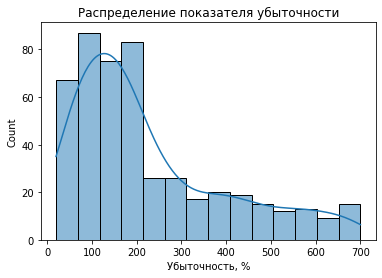

In [16]:
sns.histplot(df['Убыточность, %'], kde=True)
plt.title('Распределение показателя убыточности')
plt.show()

Теперь определимся с выбросами

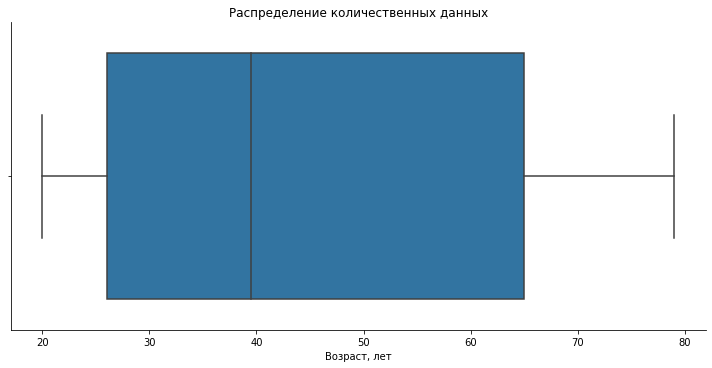

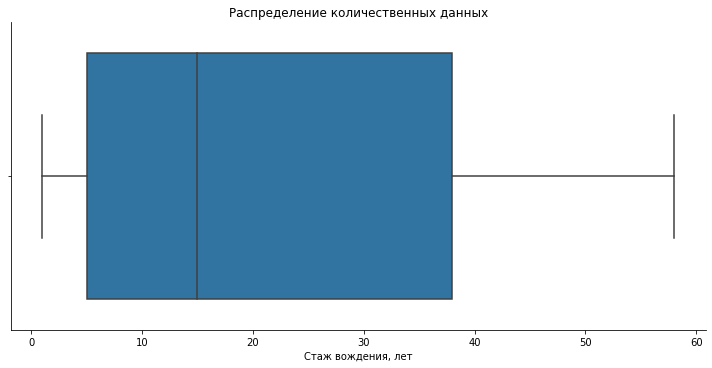

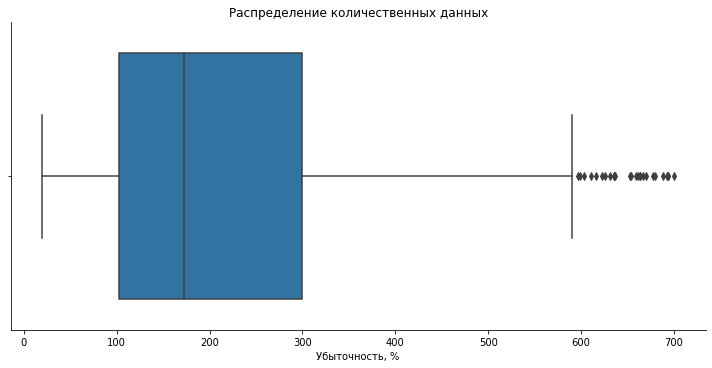

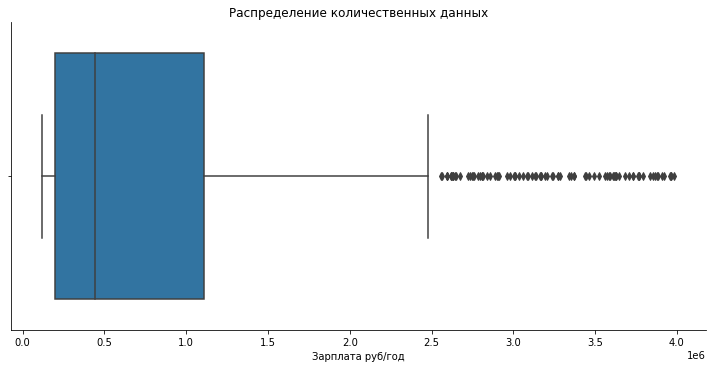

In [17]:
for i in ['Возраст, лет', 'Стаж вождения, лет', 'Убыточность, %', 'Зарплата руб/год']:
    sns.catplot(kind='box', data=df, aspect=2, x=i)
    plt.title('Распределение количественных данных')

In [18]:
def outliners(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [19]:
data = [{'Нижний выброс': outliners(i)[0], 'Верхний выброс': outliners(i)[1]} for i in [df['Возраст, лет'], df['Стаж вождения, лет']
                                                                                        , df['Убыточность, %'], df['Зарплата руб/год']]]

In [20]:
pd.DataFrame(data, index=['Возраст, лет', 'Стаж вождения, лет', 'Убыточность, %', 'Зарплата руб/год'])

,Нижний выброс,Верхний выброс
"Возраст, лет",-32.500,123.500
"Стаж вождения, лет",-44.500,87.500
"Убыточность, %",-191.375,593.625
Зарплата руб/год,-1177007.375,2481673.625


Построю график парных распределений для наших количественных признаков. Так мы сможем увидеть взаимосвязи.

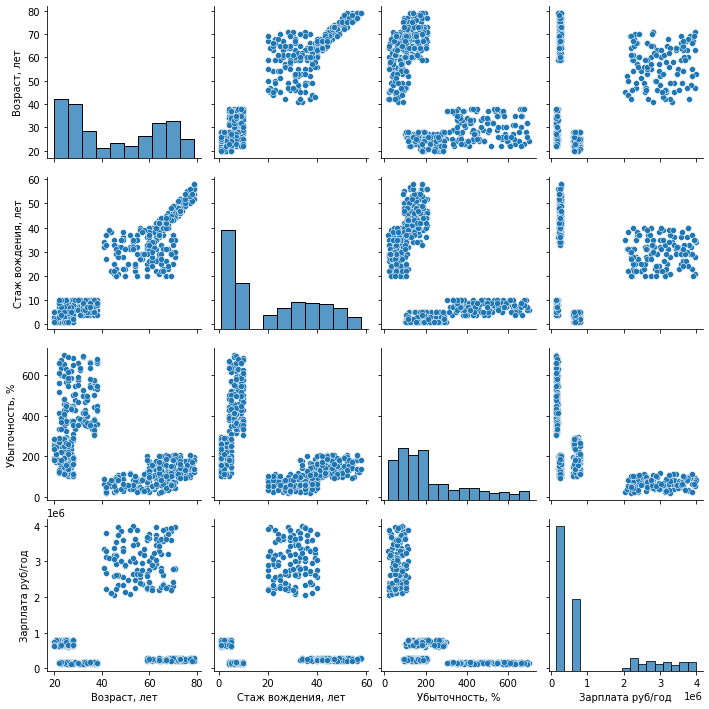

In [21]:
sns.pairplot(df)

<AxesSubplot:xlabel='Убыточность, %', ylabel='Зарплата руб/год'>

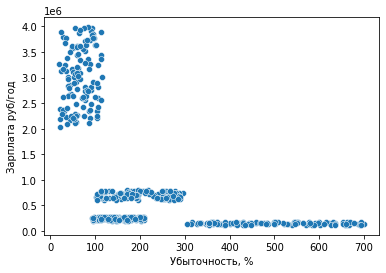

In [22]:
sns.scatterplot(x='Убыточность, %', y='Зарплата руб/год', data = df)

## Статистический анализ

**Корреляция количественных признаков**
Стандартный тест для количественных признаков - это проверка корреляции Пирсона. Однако надо проверить условия для этого теста. Если условия соблюдаются, то мы применяем тест. Если условия не соблюдаются, то мы можем либо подстроить данные к нормальному распределению, либо использовать непараметрические тесты.

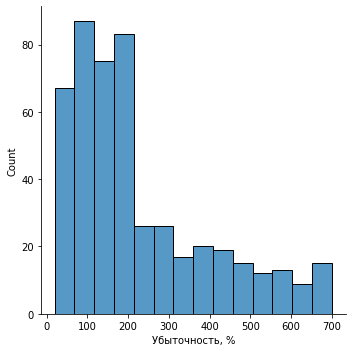

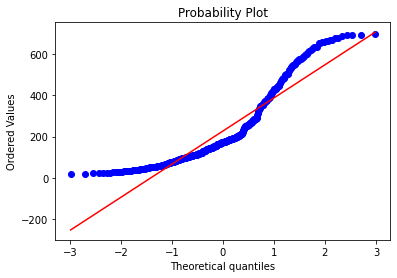

In [23]:
# Пример визуального определения нормальности распределения

sns.displot(df['Убыточность, %'])
fig = plt.figure()
res = stats.probplot(df['Убыточность, %'], plot=plt)

In [24]:
stats.shapiro(df['Убыточность, %']) # тест на нормальность Шапиро

ShapiroResult(statistic=0.8704369068145752, pvalue=1.2343861184763978e-19)

На основе полученных данных понимаем, что нормального распределения нет.

In [25]:
pg.pairwise_corr(df, columns=[['Убыточность, %'], ['Стаж вождения, лет', 'Возраст, лет', 'Зарплата руб/год']],
                 method='spearman', padjust='bonf') # корреляция "один против всех" по Спирмену
                 

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,"Убыточность, %","Стаж вождения, лет",spearman,two-sided,484,-0.430,"[-0.5, -0.35]",0.000,0.000,bonf,1.000
1,"Убыточность, %","Возраст, лет",spearman,two-sided,484,-0.508,"[-0.57, -0.44]",0.000,0.000,bonf,1.000
2,"Убыточность, %",Зарплата руб/год,spearman,two-sided,484,-0.785,"[-0.82, -0.75]",0.000,0.000,bonf,1.000


<AxesSubplot:>

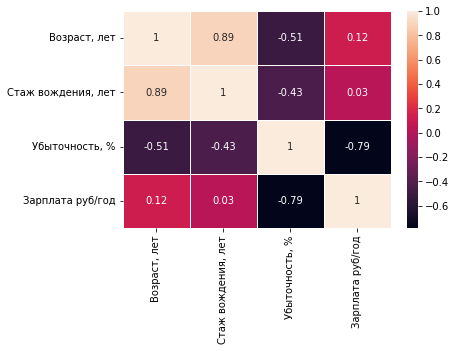

In [26]:
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=1)

## Дисперсионный анализ
Проверим тут три предположения:
1. Влияет ли возраст на убыточность;
2. Влияет ли стаж вождения на убыточность;
3. Влияет ли сумма годовой зарплаты на убыточность;


In [27]:
aov_W = welch_anova(dv='Убыточность, %', between= 'Возраст, лет', data=df)
aov_W

,Source,ddof1,ddof2,F,p-unc,np2
0,"Возраст, лет",57,79.119,25.740,0.000,0.648


In [28]:
aov_W1 = welch_anova(dv='Убыточность, %', between= 'Стаж вождения, лет', data=df)
aov_W1

,Source,ddof1,ddof2,F,p-unc,np2
0,"Стаж вождения, лет",48,81.401,28.141,0.000,0.770


In [29]:
aov_W2 = welch_anova(dv='Убыточность, %', between= 'Зарплата руб/год', data=df)
aov_W2

c:\users\mln\appdata\local\programs\python\python39\lib\site-packages\pingouin\parametric.py:1311: RuntimeWarning: invalid value encountered in double_scalars
  adj_grandmean = (weights * grp.mean()).sum() / weights.sum()
c:\users\mln\appdata\local\programs\python\python39\lib\site-packages\pingouin\parametric.py:1323: RuntimeWarning: divide by zero encountered in double_scalars
  pval = f.sf(fval, ddof1, 1 / lamb)
c:\users\mln\appdata\local\programs\python\python39\lib\site-packages\pingouin\parametric.py:1329: RuntimeWarning: divide by zero encountered in double_scalars
  'ddof2': 1 / lamb,


,Source,ddof1,ddof2,F,p-unc,np2
0,Зарплата руб/год,483,inf,0.000,1.000,1.000
